In [1]:
!ls logs

logs-converge1.txt
logs-pubhrl-block6-center-circular-graduated.txt
logs-pubhrl-center-circular-graduated.txt
logs-pubhrl-center-circular.txt
logs-pubhrl-circular-graduated.txt
logs-pubhrl.txt
logs.txt


In [2]:
import collections
import matplotlib.pyplot as plt

In [3]:
methods = ["converge1", 
           "pubhrl-center-circular-graduated", 
           "pubhrl-center-circular", 
           "pubhrl-circular-graduated", 
           "pubhrl",
           "pubhrl-block6-center-circular-graduated"]

In [4]:
texts = {}

for method in methods:
    with open("./logs/logs-{}.txt".format(method)) as f:
        texts[method] = f.readlines()

In [5]:
epochs = collections.defaultdict(list)
winrates_rulebase = collections.defaultdict(list)

for method in methods:
    for line in texts[method]:
        if "win rate (rulebase)" in line:
            winrates_rulebase[method].append(float(line.split()[4]))
        if "epoch " in line:
            epochs[method].append(int(line.split()[1]))

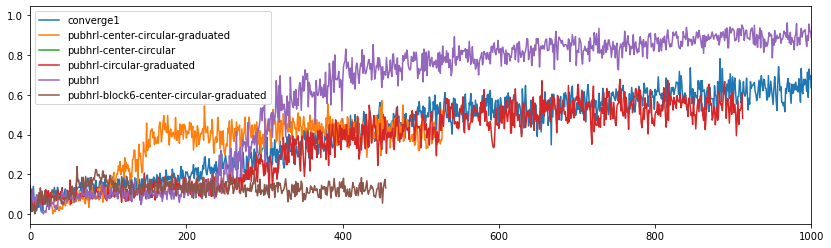

In [6]:
plt.figure(figsize=(14,4))
for method in methods:
    plt.plot(epochs[method], winrates_rulebase[method], label=method)
plt.legend()
plt.xlim(0,1000)
plt.show()